In [1]:
#import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


#loading data

In [3]:
df=pd.read_csv("/Users/almas/Documents/Data_analystics/Data/online_gaming_behavior_dataset.csv")
print(df.head())

   PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                   

## getting info


In [4]:

print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

(40034, 13)

# cleaning data

In [5]:
print(df.columns)
print(df.isna().sum())
print(df.duplicated().sum())
print(df.isna().sum().sum())
print(df.duplicated())
print(df.drop_duplicates(inplace=True))

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')
PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64
0
0
0        False
1        False
2        False
3        False
4        False
         ...  
40029    False
40030    False
40031    False
40032    False
40033    False
Length: 40034, dtype: bool
None


# finding outliers

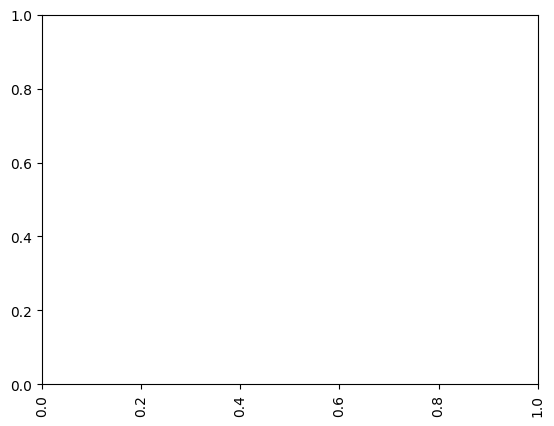

In [6]:
sns.boxplot(df=df)
plt.xticks(rotation=90)
plt.show()

                           PlayerID       Age  PlayTimeHours  InGamePurchases  \
PlayerID                   1.000000 -0.003044       0.000923         0.002321   
Age                       -0.003044  1.000000       0.002462        -0.000186   
PlayTimeHours              0.000923  0.002462       1.000000        -0.006067   
InGamePurchases            0.002321 -0.000186      -0.006067         1.000000   
SessionsPerWeek           -0.005944  0.008777      -0.003655         0.005132   
AvgSessionDurationMinutes -0.001801 -0.002269      -0.001925        -0.003059   
PlayerLevel               -0.001769  0.001353      -0.005152         0.006524   
AchievementsUnlocked       0.003190 -0.001100       0.003913         0.000098   

                           SessionsPerWeek  AvgSessionDurationMinutes  \
PlayerID                         -0.005944                  -0.001801   
Age                               0.008777                  -0.002269   
PlayTimeHours                    -0.003655         

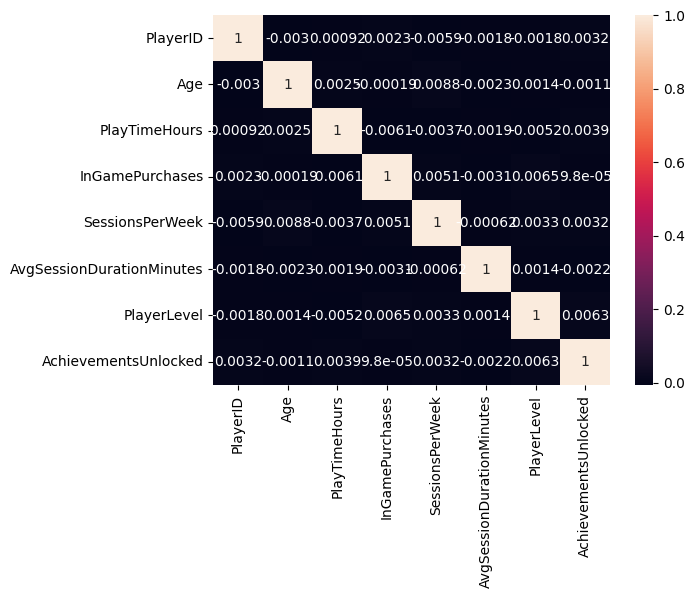

In [7]:
correlation=df.corr(numeric_only=True)
print(correlation)
sns.heatmap(correlation,annot=True)
plt.show()

In [8]:
print(df.describe())

           PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  40034.000000  40034.000000   40034.000000     40034.000000   
mean   29016.500000     31.992531      12.024365         0.200854   
std    11556.964675     10.043227       6.914638         0.400644   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19008.250000     23.000000       6.067501         0.000000   
50%    29016.500000     32.000000      12.008002         0.000000   
75%    39024.750000     41.000000      17.963831         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     40034.000000               40034.000000  40034.000000   
mean          9.471774                  94.792252     49.655568   
std           5.763667                  49.011375     28.588379   
min           0.000000                  10.000000      1.000000   
25%           4.000000                  52.

# changing datatype

In [9]:
df['PlayerID']=df['PlayerID'].astype('string')
df['Age']=df['Age'].astype('string')
df['Gender']=df['Gender'].astype('string')
df['Location']=df['Location'].astype('string')
df['GameGenre']=df['GameGenre'].astype('string')
df['PlayTimeHours']=df['PlayTimeHours'].astype('string')
df['InGamePurchases']=df['InGamePurchases'].astype('string')
df['GameDifficulty']=df['GameDifficulty'].astype('string')
df['SessionsPerWeek']=df['SessionsPerWeek'].astype('string')
df['AvgSessionDurationMinutes']=df['AvgSessionDurationMinutes'].astype('string')
df['PlayerLevel']=df['PlayerLevel'].astype('string')
df['AchievementsUnlocked']=df['AchievementsUnlocked'].astype('string')
df['EngagementLevel']=df['EngagementLevel'].astype('string')

# Assigning independant and dependant varibale to x and y

In [10]:
x=df.iloc[:,:12]
print(x)
y=df['EngagementLevel']
print(y)

      PlayerID Age  Gender Location   GameGenre       PlayTimeHours  \
0         9000  43    Male    Other    Strategy  16.271118760553215   
1         9001  29  Female      USA    Strategy   5.525961380570566   
2         9002  22  Female      USA      Sports   8.223755243499511   
3         9003  35    Male      USA      Action   5.265351277318268   
4         9004  33    Male   Europe      Action   15.53194452113429   
...        ...  ..     ...      ...         ...                 ...   
40029    49029  32    Male      USA    Strategy   20.61966242137539   
40030    49030  44  Female    Other  Simulation  13.539280463945817   
40031    49031  15  Female      USA         RPG  0.2400568811778107   
40032    49032  34    Male      USA      Sports  14.017817977715389   
40033    49033  19    Male      USA      Sports  10.083803582242297   

      InGamePurchases GameDifficulty SessionsPerWeek  \
0                   0         Medium               6   
1                   0         Mediu

 encoding categorical variables

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
c=['PlayerID','Age','Gender','Location','GameGenre','PlayTimeHours','InGamePurchases','GameDifficulty','SessionsPerWeek','AvgSessionDurationMinutes','PlayerLevel','AchievementsUnlocked','EngagementLevel']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'),c)], remainder='passthrough')
x_encoded=ct.fit_transform(df)

# splitting data to training and test data

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=.2,random_state=0)

In [13]:
x_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 337276 stored elements and shape (32027, 80448)>

In [14]:
y_train

20939    Medium
8028     Medium
30509       Low
34236      High
4665     Medium
          ...  
20757    Medium
32103      High
30403      High
21243      High
2732        Low
Name: EngagementLevel, Length: 32027, dtype: string

In [15]:
x_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 84078 stored elements and shape (8007, 80448)>

In [16]:
y_test

16798    Medium
21379    Medium
22004    Medium
25619    Medium
33789       Low
          ...  
3153        Low
29576    Medium
26308      High
13338    Medium
1550     Medium
Name: EngagementLevel, Length: 8007, dtype: string

# importing standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler()
x_train= x.fit_transform(x_train)
x_test= x.transform(x_test)

# model creation

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
print(y_pred)
print("Prediction comparison")
predict_1=pd.DataFrame({"Y_test":y_test,"Y-pred":y_pred})
print(predict_1.to_string())
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', (accuracy*100))

['Medium' 'Medium' 'Medium' ... 'High' 'Medium' 'Medium']
Prediction comparison
       Y_test  Y-pred
16798  Medium  Medium
21379  Medium  Medium
22004  Medium  Medium
25619  Medium  Medium
33789     Low     Low
5049     High    High
27561  Medium  Medium
20374  Medium  Medium
12805  Medium  Medium
20216  Medium  Medium
12662    High    High
7148      Low     Low
1699   Medium  Medium
15027  Medium  Medium
16956     Low     Low
23339    High    High
8001   Medium  Medium
1446     High    High
20224    High    High
39260     Low     Low
21502  Medium  Medium
20234     Low     Low
33048     Low     Low
11319     Low     Low
13103  Medium  Medium
21596     Low     Low
17361  Medium  Medium
39492    High    High
34038  Medium  Medium
23813    High    High
18321  Medium  Medium
4481      Low     Low
35429  Medium  Medium
10181  Medium  Medium
11822     Low     Low
11090  Medium  Medium
10280    High    High
6785   Medium  Medium
3211   Medium  Medium
30882    High    High
2714   Medium  Med

# boosting model

In [53]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model.fit(x_train, y_train)
Y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, Y_pred)
print('Accuracy:', (accuracy*100))

Accuracy: 100.0
